# Chapter 5, Example 5a
## Implementing dropouts

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import tensorflow.keras.datasets.mnist as mnist

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

2023-07-16 16:08:06.398044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size = 128
num_classes = 10
no_epochs = 20

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=10),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = batch_size,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x,test_y))
    
    return history

histories={}

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(625, activation='relu'),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])

histories['model'] = compile_and_fit(model, 'model')

Epoch 1/1000
468/469 [============================>.] - ETA: 0s - loss: 0.2096 - ce: 0.2096 - accuracy: 0.9378
Epoch: 0, accuracy:0.9379,  ce:0.2092,  loss:0.2093,  val_accuracy:0.9676,  val_ce:0.1023,  val_loss:0.1027,  
469/469 [==============================] - 5s 11ms/step - loss: 0.2093 - ce: 0.2092 - accuracy: 0.9379 - val_loss: 0.1027 - val_ce: 0.1023 - val_accuracy: 0.9676
Epoch 2/1000
469/469 [==============================] - 6s 13ms/step - loss: 0.0766 - ce: 0.0766 - accuracy: 0.9768 - val_loss: 0.0791 - val_ce: 0.0783 - val_accuracy: 0.9755
Epoch 3/1000
469/469 [==============================] - 6s 14ms/step - loss: 0.0479 - ce: 0.0479 - accuracy: 0.9848 - val_loss: 0.1124 - val_ce: 0.1111 - val_accuracy: 0.9686
Epoch 4/1000
469/469 [==============================] - 6s 14ms/step - loss: 0.0354 - ce: 0.0354 - accuracy: 0.9881 - val_loss: 0.0742 - val_ce: 0.0734 - val_accuracy: 0.9774
Epoch 5/1000
469/469 [==============================] - 7s 15ms/step - loss: 0.0248 - ce: 0

In [7]:
regularized_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(625, activation='relu'),
    Dropout(0.5),
    Dense(500, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

histories['dropout'] = compile_and_fit(regularized_model, 'dropout')

Epoch 1/1000
468/469 [============================>.] - ETA: 0s - loss: 0.3307 - ce: 0.3307 - accuracy: 0.8988
Epoch: 0, accuracy:0.8988,  ce:0.3305,  loss:0.3305,  val_accuracy:0.9624,  val_ce:0.1195,  val_loss:0.1207,  
469/469 [==============================] - 12s 24ms/step - loss: 0.3305 - ce: 0.3305 - accuracy: 0.8988 - val_loss: 0.1207 - val_ce: 0.1195 - val_accuracy: 0.9624
Epoch 2/1000
469/469 [==============================] - 11s 23ms/step - loss: 0.1543 - ce: 0.1544 - accuracy: 0.9529 - val_loss: 0.0934 - val_ce: 0.0924 - val_accuracy: 0.9720
Epoch 3/1000
469/469 [==============================] - 10s 21ms/step - loss: 0.1216 - ce: 0.1215 - accuracy: 0.9628 - val_loss: 0.0759 - val_ce: 0.0751 - val_accuracy: 0.9768
Epoch 4/1000
469/469 [==============================] - 11s 24ms/step - loss: 0.1024 - ce: 0.1024 - accuracy: 0.9685 - val_loss: 0.0709 - val_ce: 0.0702 - val_accuracy: 0.9779
Epoch 5/1000
469/469 [==============================] - 12s 25ms/step - loss: 0.0883 - 

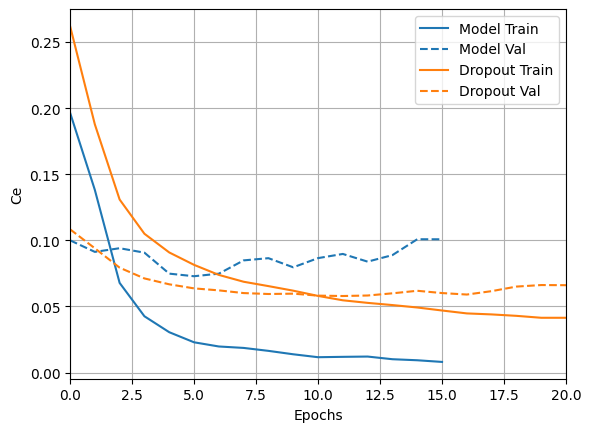

In [8]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

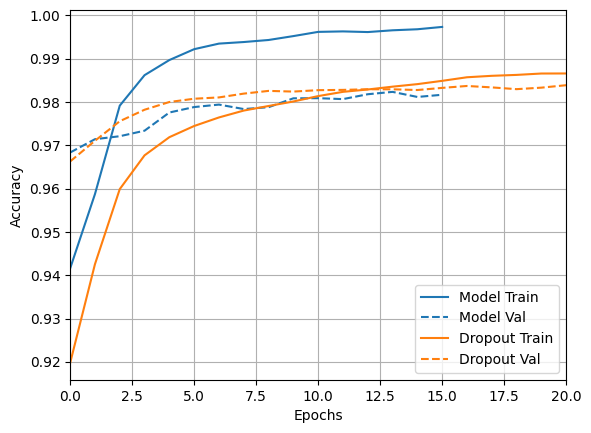

In [9]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)